In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import data file and clean it.

In [51]:
df = pd.read_csv('Downloads/business_analysis_cleaned.csv')
df.head()
df.rename(columns ={'Product Category':'Product_Category','Sub-Category':'Sub_Category','Quantity Sold':'Quantity_Sold','Inventory Days':'Inventory_Days'}, inplace=True)
df.head()

,Date,Product_Category,Sub_Category,Region,Sales,Profit,Revenue,Quantity_Sold,Inventory_Days,Season
0,2025-01-23,Electronics,Camera,West,156,187,343,22,22,Fall
1,2025-08-11,Apparel,Shoes,South,979,193,1172,14,72,Spring
2,2025-08-17,Electronics,Mobile,East,632,30,662,93,72,Summer
3,2025-12-06,Apparel,Jeans,East,148,31,179,82,45,Winter
4,2025-03-22,Home Appliances,Vacuum Cleaner,South,710,153,863,89,10,Spring


# Drop Null Values.

In [31]:
df_clean = df.dropna()

# Basic Information.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              100 non-null    object
 1   Product_Category  100 non-null    object
 2   Sub_Category      100 non-null    object
 3   Region            100 non-null    object
 4   Sales             100 non-null    int64 
 5   Profit            100 non-null    int64 
 6   Revenue           100 non-null    int64 
 7   Quantity_Sold     100 non-null    int64 
 8   Inventory_Days    100 non-null    int64 
 9   Season            100 non-null    object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


# Convert datatype into date formate.

In [60]:
df['Date'] =pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


In [52]:
df.isnull().sum()

Date                0
Product_Category    0
Sub_Category        0
Region              0
Sales               0
Profit              0
Revenue             0
Quantity_Sold       0
Inventory_Days      0
Season              0
dtype: int64

# Describe basic statistic of attributes.

In [64]:
print(df[['Sales','Profit','Revenue','Quantity_Sold']].describe())

           Sales      Profit     Revenue  Quantity_Sold
count  100.00000  100.000000   100.00000     100.000000
mean   545.44000  102.710000   648.15000      47.650000
std    268.00706   54.159192   281.18312      27.898581
min    101.00000   10.000000   125.00000       2.000000
25%    279.25000   53.750000   381.00000      24.000000
50%    560.50000   98.500000   656.00000      45.500000
75%    715.75000  149.250000   858.25000      69.250000
max    998.00000  196.000000  1172.00000     100.000000


In [53]:
# Create SQLite in-memory database
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('retail_data', conn, index=False, if_exists='replace')
df.head()

,Date,Product_Category,Sub_Category,Region,Sales,Profit,Revenue,Quantity_Sold,Inventory_Days,Season
0,2025-01-23,Electronics,Camera,West,156,187,343,22,22,Fall
1,2025-08-11,Apparel,Shoes,South,979,193,1172,14,72,Spring
2,2025-08-17,Electronics,Mobile,East,632,30,662,93,72,Summer
3,2025-12-06,Apparel,Jeans,East,148,31,179,82,45,Winter
4,2025-03-22,Home Appliances,Vacuum Cleaner,South,710,153,863,89,10,Spring


# SQL query for profit margin by category and sub-category.

In [55]:
query = """
SELECT 
    Product_Category,
    Sub_Category,
    SUM(Profit) AS Total_Profit,
    SUM(Sales) AS Total_Sales,
    ROUND(SUM(Profit) * 100.0 / SUM(Sales), 2) AS Profit_Margin_Percent
FROM retail_data
GROUP BY Product_Category, Sub_Category
ORDER BY Profit_Margin_Percent ASC
"""
sql_result = pd.read_sql(query, conn)
sql_result.head()

,Product_Category,Sub_Category,Total_Profit,Total_Sales,Profit_Margin_Percent
0,Home Appliances,Mixer,339,3071,11.04
1,Home Appliances,Microwave,572,3898,14.67
2,Apparel,Shoes,698,4541,15.37
3,Groceries,Beverages,379,2382,15.91
4,Electronics,Mobile,556,3488,15.94


# Correlation check.

                Inventory_Days    Profit
Inventory_Days        1.000000 -0.026489
Profit               -0.026489  1.000000


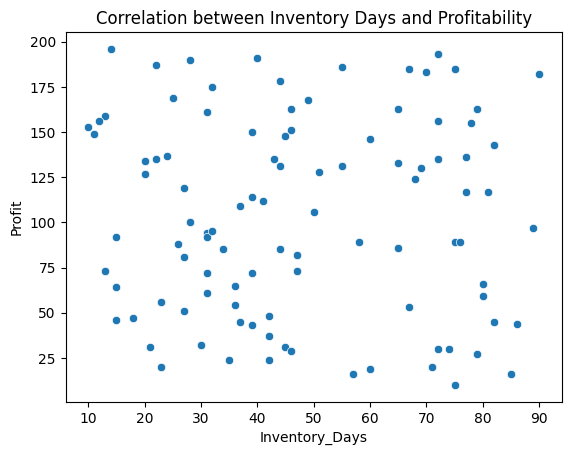

In [56]:
correlation = df[['Inventory_Days', 'Profit']].corr()
print(correlation)

# Visualization
sns.scatterplot(data=df, x='Inventory_Days', y='Profit')
plt.title('Correlation between Inventory Days and Profitability')
plt.show()

